if we have a normal distribution or a bell shaped curve then we are using this method

here the values outside 3 standard deviation(i.e., outside the interval (u-3q, u + 3q) are outliers


mean = u, sd = q

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Scholarship.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [5]:
df.shape

(1000, 3)

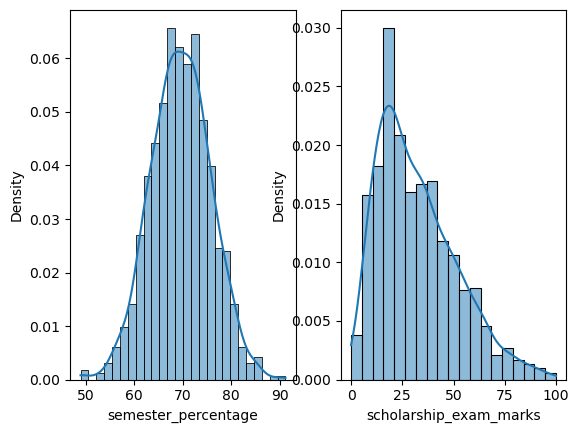

In [10]:
plt.subplot(1,2,1)
sns.histplot(df["semester_percentage"], stat="density", kde=True)
plt.subplot(1,2,2)
sns.histplot(df["scholarship_exam_marks"], stat="density", kde=True)
plt.show()

In [11]:
mean = df["semester_percentage"].mean()
std = df["semester_percentage"].std()

In [13]:
mean , std

(69.61240000000004, 6.158978751323897)

In [14]:
print(mean, std)

69.61240000000004 6.158978751323897


In [15]:
Highest_allowed = mean + 3*std
Lowest_allowed = mean - 3*std

In [16]:
print(Highest_allowed , " , ", Lowest_allowed)

88.08933625397172  ,  51.13546374602835


In [17]:
df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"]> Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [18]:
df[(df["semester_percentage"]> Lowest_allowed) & (df["semester_percentage"]< Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


now here we found out about what the outliers are, so again we will find these outliers using z-score

In [29]:
df["z_score"] = (df["semester_percentage"]-df["semester_percentage"].mean())/df["semester_percentage"].std()

In [30]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


now this z-score shows standard normal distribution, now the outliers will be

In [32]:
df[(df["z_score"]<-3) |(df["z_score"]>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


these are outliers

In [33]:
df[(df["z_score"]>-3) &(df["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


now i don't want to remove those 5 rows, so we will use capping

In [34]:
upper_limit = Highest_allowed
lower_limit = Lowest_allowed

In [35]:
df["semester_percentage"] = np.where(df["semester_percentage"]> upper_limit, upper_limit, np.where(df["semester_percentage"]<lower_limit, lower_limit,df["semester_percentage"]))

In [36]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [37]:
df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"]> Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score


so there are no outliers left